In [1]:
import sys, os

MARIPOSA_PATH = "/home/yizhou7/mariposa/"

sys.path.append(MARIPOSA_PATH + "src")
os.chdir(MARIPOSA_PATH)

from debugger.strainer import DebugStatus
from debugger.options import DbgMode, DebugOptions
from bench.viewer import BenchViewer
from bench.factory import *
from bench.consts import *
import numpy as np

In [2]:
viewer = get_combined_viewer()

[WARN] [init] 0b497bc090 trace did not fail, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [init] 5b7d18ab3e trace did not fail, fallback to fast_fail 
[WARN] [init] 3cead21983 trace slow unknown, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [init] 8d058577cd trace slow unknown, fallback to fast_fail 
[WARN] [init] d4e5e77cbc trace slow unknown, fallback to fast_fail 
[WARN] [init] e998d08b31 trace slow unknown, fallback to fast_fail 
[WARN] [init] 3ce5c5e4dc trace slow unknown, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [init] 2a3b1202bd trace slow unknown, fallback to fast_fail 


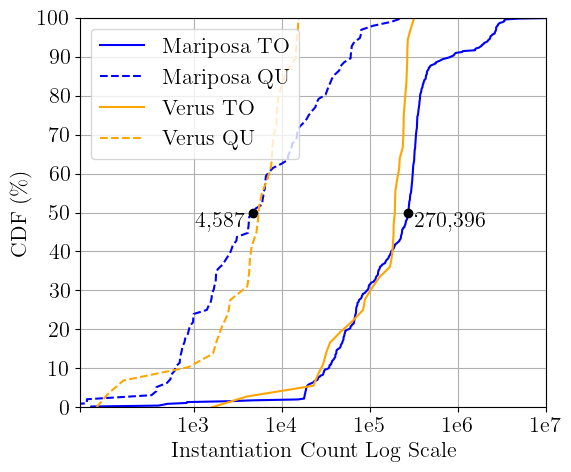

In [6]:
from utils.analysis_utils import PartialCDF
from utils.plot_utils import *

fig, ax = plt.subplots(figsize=(6, 5))  # Figure size (width, height)

for mp in METAS:
    data = []

    for q in mp.members:
        dbg = viewer[q]
        stats = dbg.query_stats
        if np.isnan(stats.trace_inst_count):
            continue
        data.append(stats.trace_inst_count)

    cdf = PartialCDF(data)
    ax.plot(
        cdf.xs, cdf.ys, label=mp.full_name(), color=mp.color, linestyle=mp.line_style
    )

    if mp == MP_QU:
        pt = np.percentile(cdf.xs, 50)
        ax.plot(pt, 50, marker="o", color="black")
        ax.text(pt * 0.8, 50, f"{int(pt):,}", va="top", ha="right", color="black")

    if mp == MP_TO:
        pt = np.percentile(cdf.xs, 50)
        ax.plot(pt, 50, marker="o", color="black")
        ax.text(pt * 1.2, 50, f"{int(pt):,}", va="top", ha="left", color="black")

        # pt = np.percentile(cdf.xs, 10)
        # ax.plot(pt, 10, marker="o", color="black")
        # ax.text(pt*1.2, 10, f'{int(pt):,}', va='top', ha='left', color="black")

ax.set_xscale("log")
ax.grid()

ax.set_yticks(np.arange(0, 101, 10))
ax.set_xlim(50, 1e7)
ax.set_xticks(
    [50, 1000, 10000, 100000, 1000000, 10000000],
    ["", "1e3", "1e4", "1e5", "1e6", "1e7"],
)
ax.set_ylim(0, 100)

plt.ylabel("CDF (\%)")
plt.xlabel("Instantiation Count Log Scale")
plt.legend()
plt.tight_layout()
plt.savefig(
    "fig/debugger/inst_count_cdf.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1
)
# plt.clf()